In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
# Load your dataset
df = pd.read_csv('Insurance Claim/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,1
1335,18,female,36.850,0,no,southeast,1629.83350,1
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,1


In [36]:
df.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,male,30.97,3,no,northwest,10600.5483,0
1334,18,female,31.92,0,no,northeast,2205.9808,1
1335,18,female,36.85,0,no,southeast,1629.8335,1
1336,21,female,25.80,0,no,southwest,2007.9450,0
1337,61,female,29.07,0,yes,northwest,29141.3603,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   object 
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   object 
 5   region          1338 non-null   object 
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [38]:
df.describe()

,age,bmi,children,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.585202
std,14.049960,6.098187,1.205493,12110.011237,0.492871
min,18.000000,15.960000,0.000000,1121.873900,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000


In [39]:
df.shape

(1338, 8)

In [40]:
df.isnull().any()

age               False
sex               False
bmi               False
children          False
smoker            False
region            False
charges           False
insuranceclaim    False
dtype: bool

In [41]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [42]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler

df=pd.get_dummies(df,columns=['sex'],drop_first=True)
df=pd.get_dummies(df,columns=['smoker'],drop_first=True)
df=pd.get_dummies(df,columns=['region'],drop_first=True)

In [43]:
df

,age,bmi,children,charges,insuranceclaim,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,False,True,False,False,True
1,18,33.770,1,1725.55230,1,True,False,False,True,False
2,28,33.000,3,4449.46200,0,True,False,False,True,False
3,33,22.705,0,21984.47061,0,True,False,True,False,False
4,32,28.880,0,3866.85520,1,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,True,False,True,False,False
1334,18,31.920,0,2205.98080,1,False,False,False,False,False
1335,18,36.850,0,1629.83350,1,False,False,False,True,False
1336,21,25.800,0,2007.94500,0,False,False,False,False,True


In [44]:
X=df.drop(columns=['insuranceclaim'])
y=df['insuranceclaim']

In [45]:
X

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [46]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# Save the model columns to a file
model_columns = X_train.columns.tolist()
joblib.dump(model_columns, 'model_columns.joblib')

['model_columns.joblib']

In [49]:
import joblib

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler,'scaler.joblib')

['scaler.joblib']

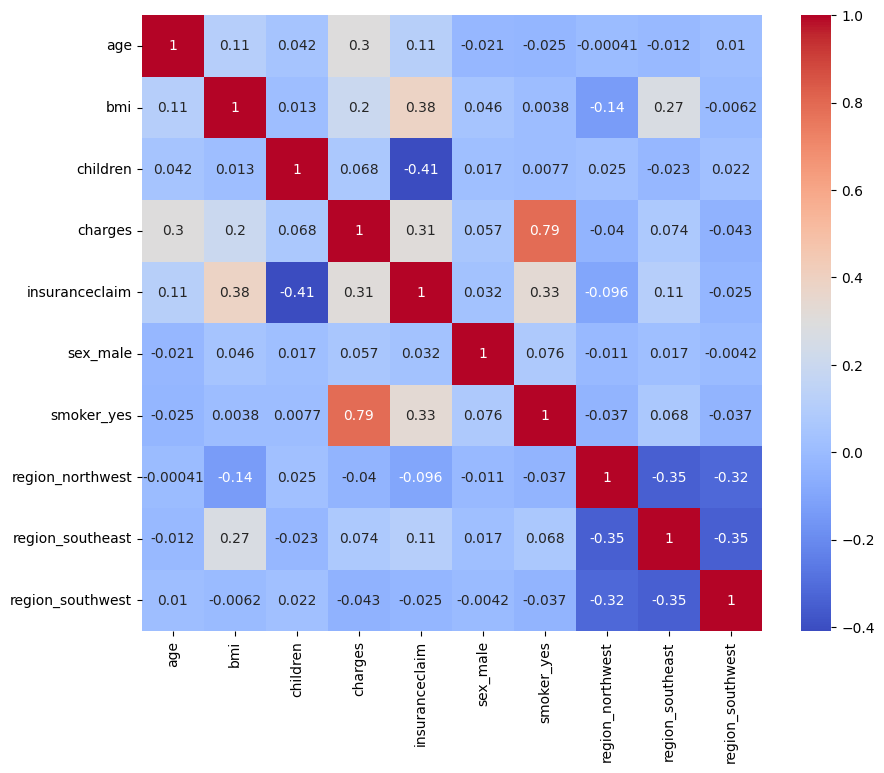

In [17]:
# Visualization: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

C:\Users\gurug\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gurug\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\gurug\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\gurug\AppDat

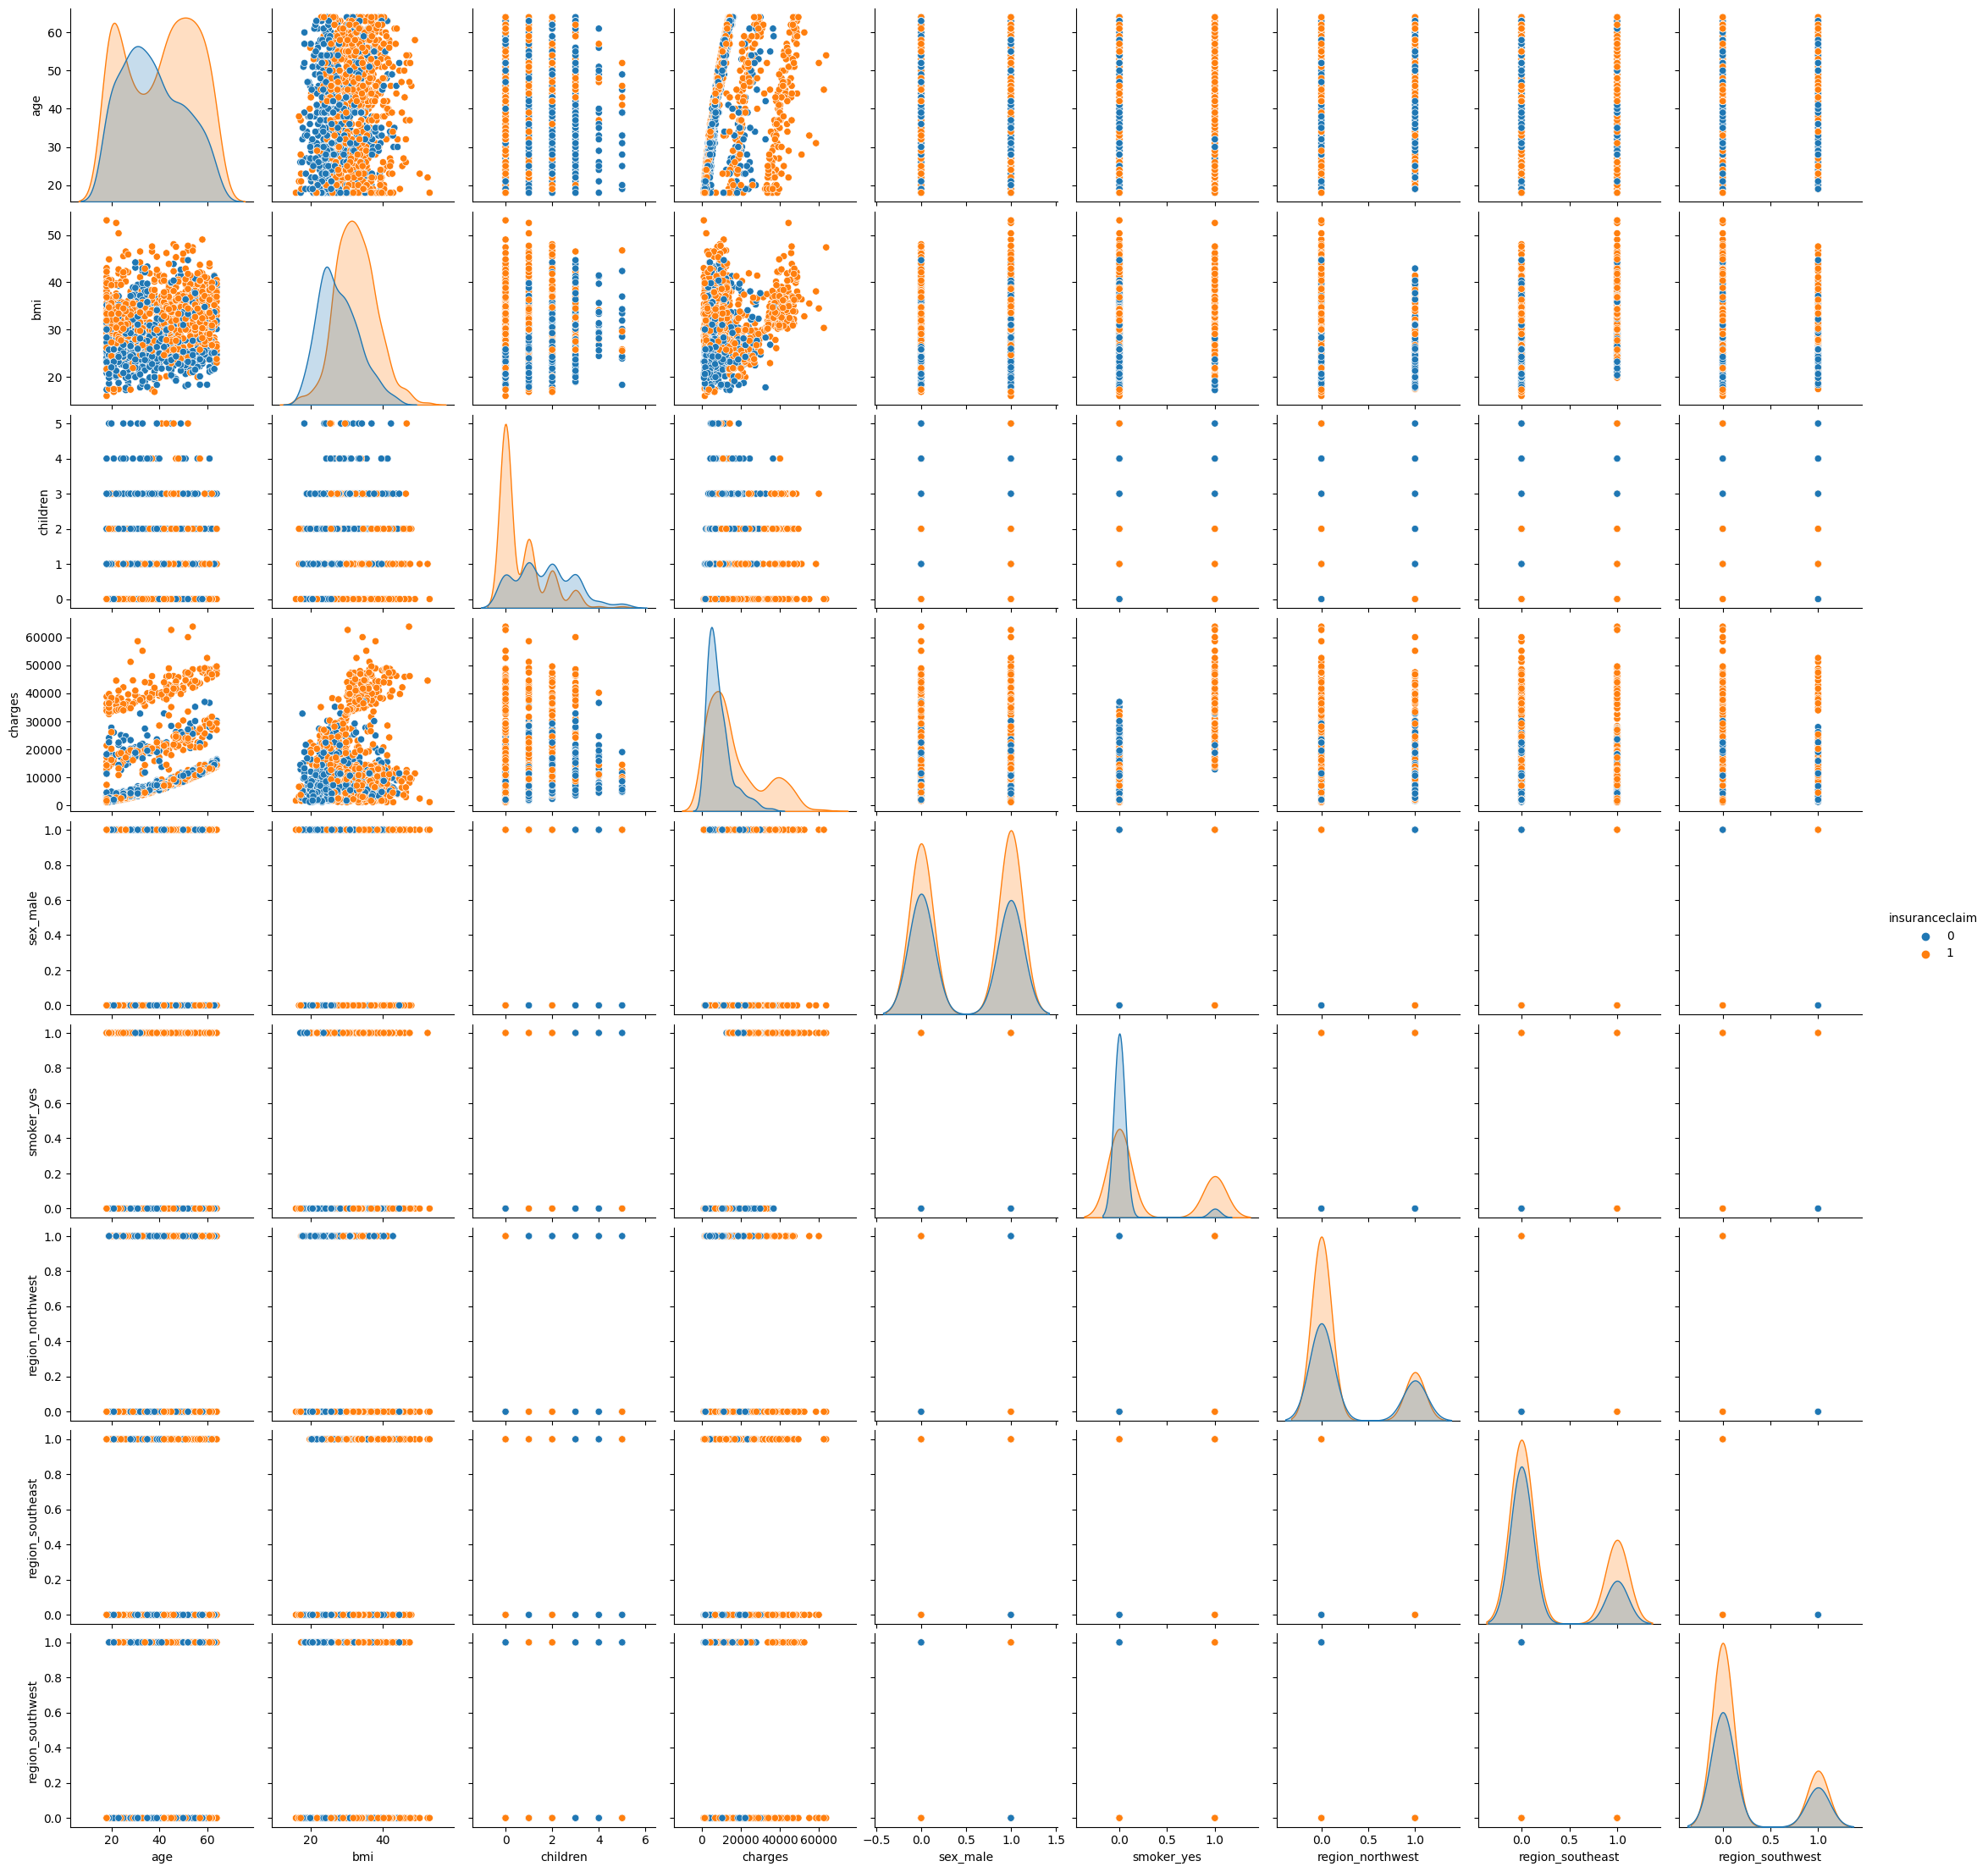

In [18]:
# Visualization: Pairplot
sns.pairplot(df, hue='insuranceclaim')
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Train different models
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("Support Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
print("Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

# Extreme Gradient Boosting
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
print("Extreme Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Logistic Regression:
Accuracy: 0.8731343283582089
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       161
           1       0.90      0.88      0.89       241

    accuracy                           0.87       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.87      0.87      0.87       402

Confusion Matrix:
 [[138  23]
 [ 28 213]]
Decision Tree:
Accuracy: 0.9676616915422885
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       161
           1       0.97      0.97      0.97       241

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402

Confusion Matrix:
 [[155   6]
 [  7 234]]
Random Forest:
Accuracy: 0.9353233830845771
Classification Report:
               precision    recall  f1-score   suppor

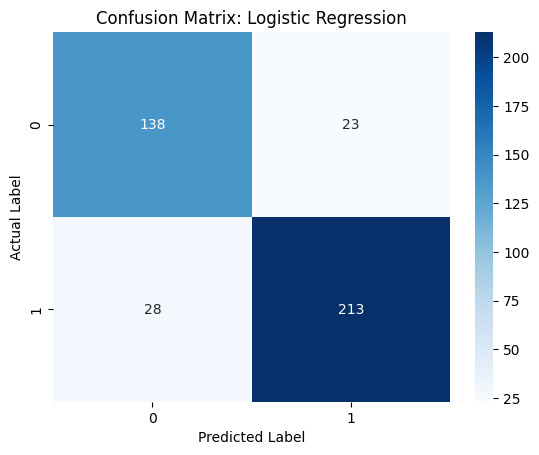

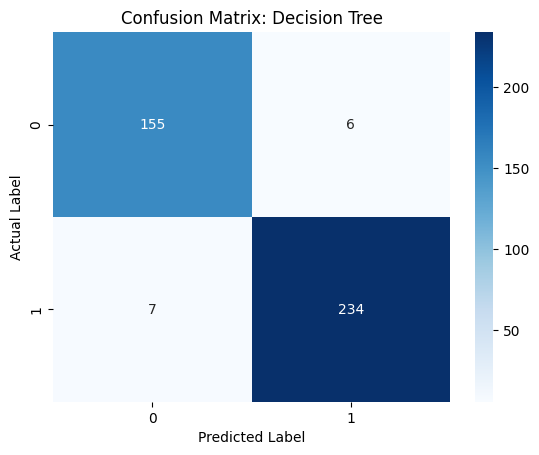

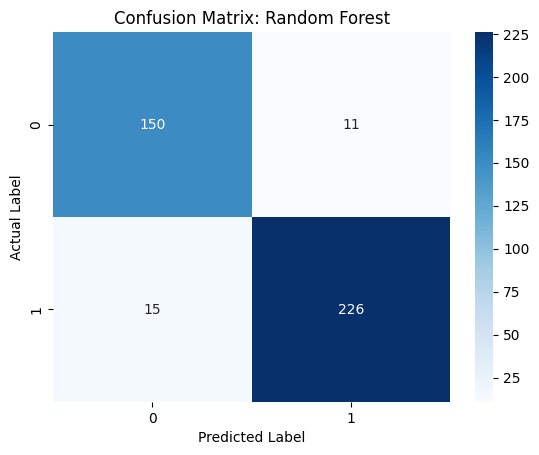

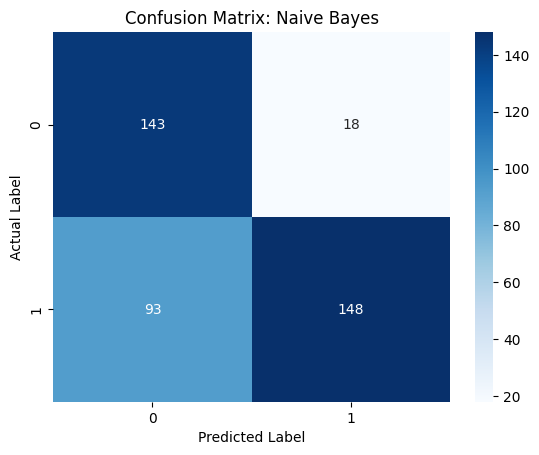

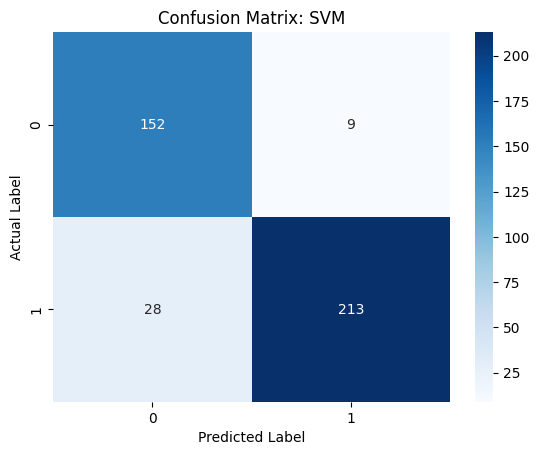

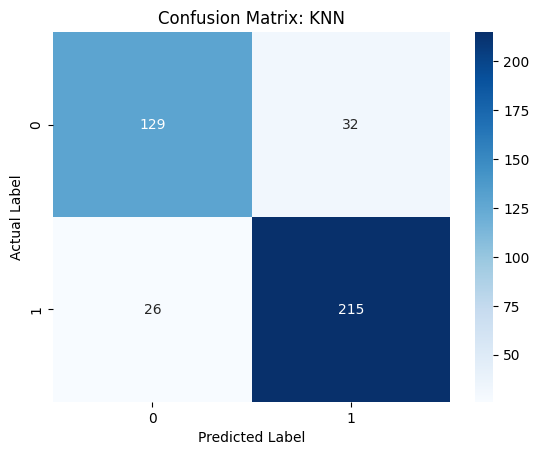

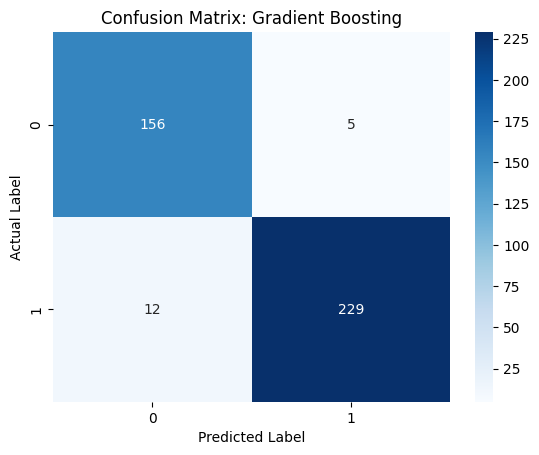

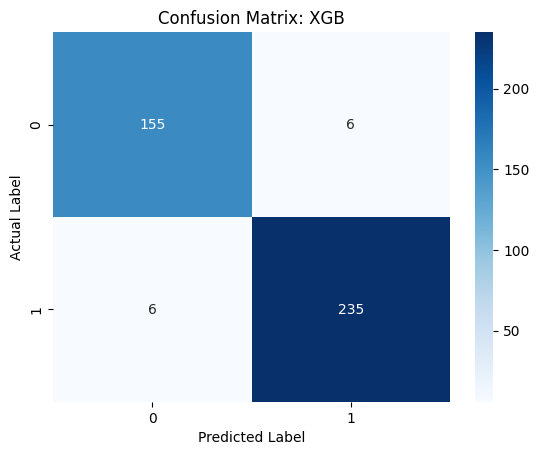

In [20]:
#Visualization for Confusion Matrices
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {title}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plotting confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression')
plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree')
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes')
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')
plot_confusion_matrix(y_test, y_pred_knn, 'KNN')
plot_confusion_matrix(y_test, y_pred_gb, 'Gradient Boosting')
plot_confusion_matrix(y_test, y_pred_xgb, 'XGB')


C:\Users\gurug\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


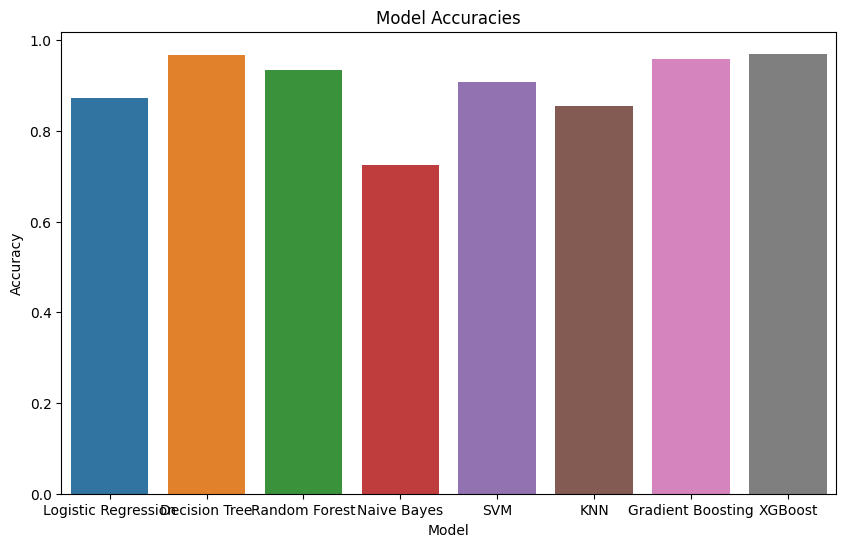

In [21]:
# Compare model accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM', 'KNN', 'Gradient Boosting', 'XGBoost']
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), 
              accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn), 
              accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_xgb)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for each model
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    'Decision Tree': {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 10]},
    'Naive Bayes': {},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 10]},
    'Gradient Boosting': {'learning_rate': [0.1, 0.5, 1], 'n_estimators': [10, 50, 100]},
    'XGBoost': {'learning_rate': [0.1, 0.5, 1], 'n_estimators': [10, 50, 100]}
}

# Perform grid search for each model
for model, param_grid in param_grids.items():
    if model == 'Logistic Regression':
        grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
    elif model == 'Decision Tree':
        grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
    elif model == 'Random Forest':
        grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
    elif model == 'Naive Bayes':
        grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5)
    elif model == 'SVM':
        grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    elif model == 'KNN':
        grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    elif model == 'Gradient Boosting':
        grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
    elif model == 'XGBoost':
        grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5)

    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for {model}: {grid_search.best_params_}")
    print(f"Best Score for {model}: {grid_search.best_score_}")
    print()

C:\Users\gurug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gurug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gurug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gurug\AppData\Local\Programs\Python\

Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Best Score for Logistic Regression: 0.8183411082034361

Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}
Best Score for Decision Tree: 0.960450563204005

Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Best Score for Random Forest: 0.9561838661963818

Best Parameters for Naive Bayes: {}
Best Score for Naive Bayes: 0.7756400045511435



KeyboardInterrupt: 

In [23]:
# Feature Importance using Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importances_rf = rf.feature_importances_
print("Feature Importances using Random Forest:")
for feature, importance in zip(X_train.columns, feature_importances_rf):
    print(f"{feature}: {importance:.3f}")

# Feature Importance using XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
feature_importances_xgb = xgb.feature_importances_
print("\nFeature Importances using XGBoost:")
for feature, importance in zip(X_train.columns, feature_importances_xgb):
    print(f"{feature}: {importance:.3f}")

Feature Importances using Random Forest:
age: 0.099
bmi: 0.357
children: 0.247
charges: 0.169
sex_male: 0.010
smoker_yes: 0.091
region_northwest: 0.010
region_southeast: 0.009
region_southwest: 0.007

Feature Importances using XGBoost:
age: 0.096
bmi: 0.160
children: 0.264
charges: 0.025
sex_male: 0.007
smoker_yes: 0.421
region_northwest: 0.014
region_southeast: 0.006
region_southwest: 0.008


C:\Users\gurug\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


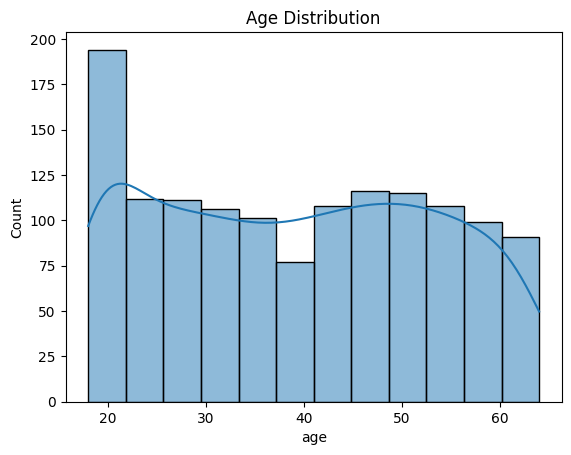

C:\Users\gurug\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


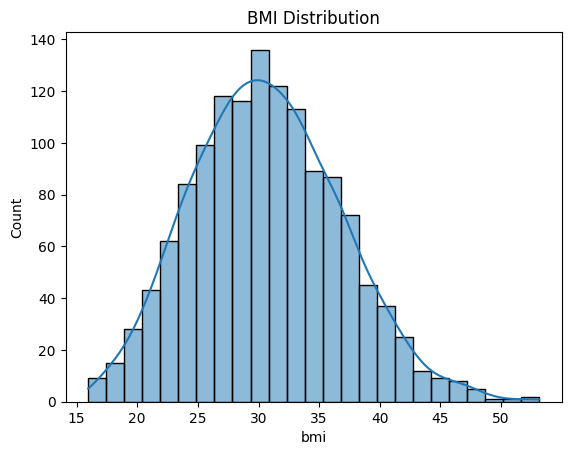

C:\Users\gurug\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


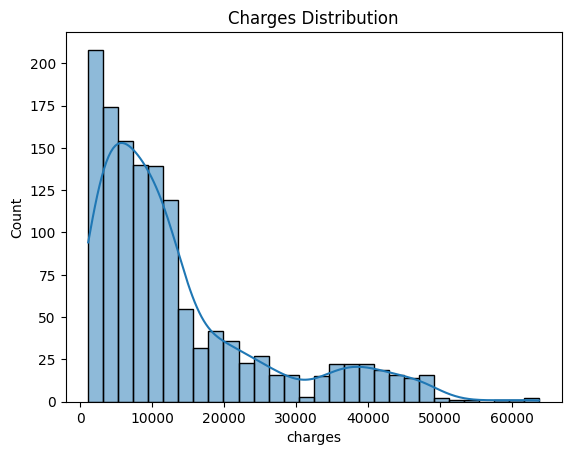

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of age
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Distribution of bmi
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

# Distribution of charges
sns.histplot(df['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()

# Bar plot for region-wise insurance claims
#sns.countplot(x='region', hue='insuranceclaim', data=df)
#plt.title('Region-wise Insurance Claims')
#plt.show()

In [27]:
# Select the best model based on accuracy
best_model = max(accuracies)
best_model_index = accuracies.index(best_model)
best_model_name = models[best_model_index]
print(f"Best Model: {best_model_name} with Accuracy: {best_model:.3f}")

Best Model: XGBoost with Accuracy: 0.970


In [28]:
# Assuming you have already trained models: lr, rf, svm, knn
# and you're using accuracy as the performance metric

from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
lr_accuracy = accuracy_score(y_test, y_pred_lr)
dt_accuracy=accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
nb_accuracy=accuracy_score(y_test, y_pred_nb)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
gb_accuracy=accuracy_score(y_test, y_pred_gb)
xgb_accuracy=accuracy_score(y_test, y_pred_xgb)

# Store the accuracy scores in a dictionary
model_scores = {
    "LogisticRegression": lr_accuracy,
    "Decision Tree": dt_accuracy,
    "RandomForest": rf_accuracy,
    "Naive Bayes": nb_accuracy,
    "SVM": svm_accuracy,
    "KNN": knn_accuracy,
    "Gradient Boosting": gb_accuracy,
    "Extreme Gradient Boosting": xgb_accuracy
}

# Find the model with the highest accuracy
best_model_name = max(model_scores, key=model_scores.get)
print(f"Best Model: {best_model_name}")

# Dictionary of models for easy lookup
models = {
    "LogisticRegression": lr,
    "Decision Tree": dt,
    "RandomForest": rf,
    "Naive Bayes": nb,
    "SVM": svm,
    "KNN": knn,
    "Gradient Boosting": gb,
    "Extreme Gradient Boosting": xgb
}

# Get the best model object
best_model = models[best_model_name]

# Save the best model using joblib
import joblib
joblib.dump(best_model, f"health_insurance_{best_model_name}.joblib")

# Load the saved model
loaded_model = joblib.load(f"health_insurance_{best_model_name}.joblib")

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)

# Display predictions
print(predictions)


Best Model: Extreme Gradient Boosting
[0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0
 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0
 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1
 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0
 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0]


In [29]:
import joblib

# Save the best model
joblib.dump(best_model, f"health_insurance_{best_model_name}.joblib")

['health_insurance_Extreme Gradient Boosting.joblib']

In [31]:
# Load the saved model
loaded_model = joblib.load(f"health_insurance_{best_model_name}.joblib")

# Make predictions
predictions = loaded_model.predict(X_test)
print(predictions)

[0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0
 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0
 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1
 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0
 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0]


In [50]:
import joblib
import pandas as pd

# Load the saved scaler
scaler = joblib.load('scaler.joblib')

# New data for prediction
new_data = pd.DataFrame({
    'age': [19],
    'sex': ['female'],
    'bmi': [27.900],
    'children': [0],
    'smoker': ['yes'],
    'region': ['southwest'],
    'charges': [16884.92400]
})

'''# Apply the same one-hot encoding to the new data
new_data_processed = pd.get_dummies(new_data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Ensure new data has the same columns as the training data
missing_cols = set(X_train.columns) - set(new_data_processed.columns)
for col in missing_cols:
    new_data_processed[col] = 0

# Reorder the new data's columns to match the training data's column order
new_data_processed = new_data_processed[X_train.columns]

# Feature scaling
new_data_scaled = scaler.transform(new_data_processed)

# Make predictions using the trained models
print("Logistic Regression Prediction:", lr.predict(new_data_scaled))
print("Random Forest Prediction:", rf.predict(new_data_scaled))
print("SVM Prediction:", svm.predict(new_data_scaled))
print("KNN Prediction:", knn.predict(new_data_scaled))'''

# Apply the same one-hot encoding to the new data
new_data_processed = pd.get_dummies(new_data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Ensure new data has the same columns as the training data
missing_cols = set(X_train.columns) - set(new_data_processed.columns)
for col in missing_cols:
    new_data_processed[col] = 0

# Reorder the new data's columns to match the training data's column order
new_data_processed = new_data_processed[X_train.columns]

# Check if column names match
#print("Columns in new_data_processed:", new_data_processed.columns)
#print("Columns in X_train:", X_train.columns)

# Feature scaling
new_data_scaled = scaler.transform(new_data_processed)

# Make predictions using the trained models
'''print("Logistic Regression Prediction:", lr.predict(new_data_scaled))
print("Decision Tree Prediction:", dt.predict(new_data_scaled))
print("Random Forest Prediction:", rf.predict(new_data_scaled))
print("Naive Bayes Prediction:", nb.predict(new_data_scaled))
print("SVM Prediction:", svm.predict(new_data_scaled))
print("KNN Prediction:", knn.predict(new_data_scaled))
print("Gradient Boosting Prediction:", gb.predict(new_data_scaled))'''
print("XGB Prediction:", xgb.predict(new_data_scaled))

XGB Prediction: [1]
